In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
#%pylab inline
import datetime

matplotlib.interactive(True)

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [5]:
datadir = '/media/sf_VBox_Shared/London/raw/first5/subsets/'

In [6]:
filenames = os.listdir(datadir)
datasets = [pd.read_csv(os.path.join(datadir,fn)) for fn in filenames if os.path.isfile(os.path.join(datadir,fn))]
print(len(datasets))

11


In [7]:
all_data = pd.concat(datasets)

In [10]:
anglex = np.array(all_data['anglex'])
angley = np.array(all_data['angley'])
anglez = np.array(all_data['anglez'])
acc = np.array(all_data['acceleration']) + 1

In [11]:
radtodegree = 180/np.pi
theta = anglex/radtodegree
psi = angley/radtodegree
phi = anglez/radtodegree

In [12]:
x = np.sin(theta)
y = np.sin(psi)
z = np.tan(phi)*np.sqrt(x**2 + y**2)

In [13]:
a_x = x*acc
a_y = y*acc
a_z = z*acc

In [22]:
calculated_acc = np.sqrt(all_data['roll_med_acc_x']**2 + all_data['roll_med_acc_y']**2 + all_data['roll_med_acc_z']**2)

## Plot correlations

(-1.5, 1.5)

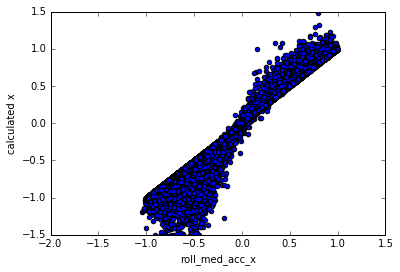

In [16]:
# The caclulated acceleration in x direction is more extreme than the 
plt.scatter(all_data['roll_med_acc_x'], a_x)
plt.xlabel('roll_med_acc_x')
plt.ylabel('calculated acc_x')
plt.ylim(-1.5, 1.5)

(0, 4)

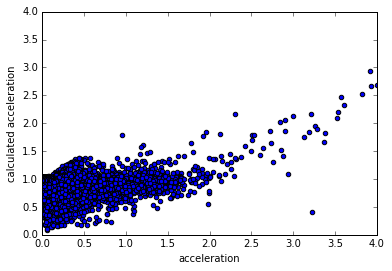

In [25]:
# 
plt.scatter(all_data['acceleration'], calculated_acc)
plt.xlabel('acceleration')
plt.ylabel('calculated acceleration')
plt.xlim(0, 4)
plt.ylim(0, 4)

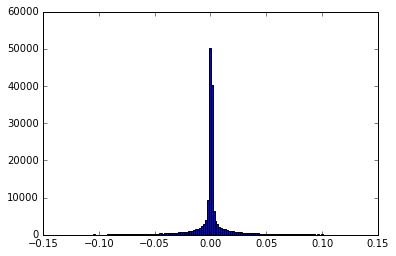

In [21]:
plt.hist(all_data['dev_roll_med_acc_x'], bins=1000)
plt.xlim(-0.15, 0.15);